# K-means

### TODO:
- přidat příklady z dokumentace sklearn

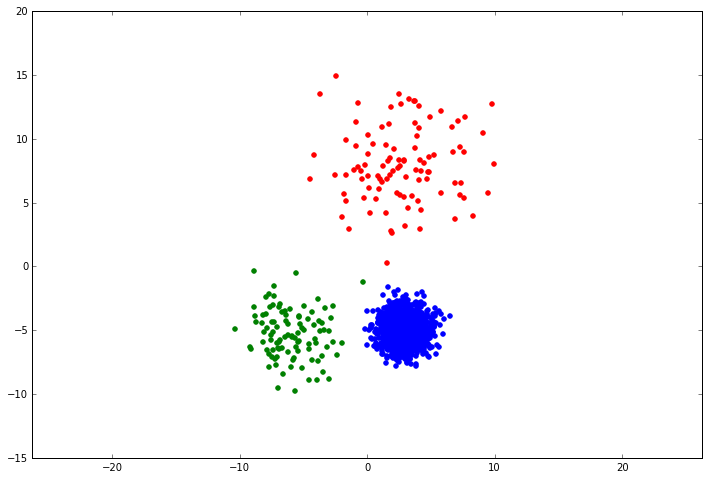

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

def gen_cluster(x, y, r, s=100):
    xs = r * np.random.randn(s) + x
    ys = r * np.random.randn(s) + y
    return xs, ys

def plot_cluster(cl, c):
    x, y = cl
    plt.scatter(x, y, color=c)
    return cl

plt.figure(figsize=(12,8))
plt.axis('equal')
c1 = plot_cluster(gen_cluster(3, 8, 3), 'r')
c2 = plot_cluster(gen_cluster(-6, -5, 2), 'g')
c3 = plot_cluster(gen_cluster(3, -5, 1, 1500), 'b')

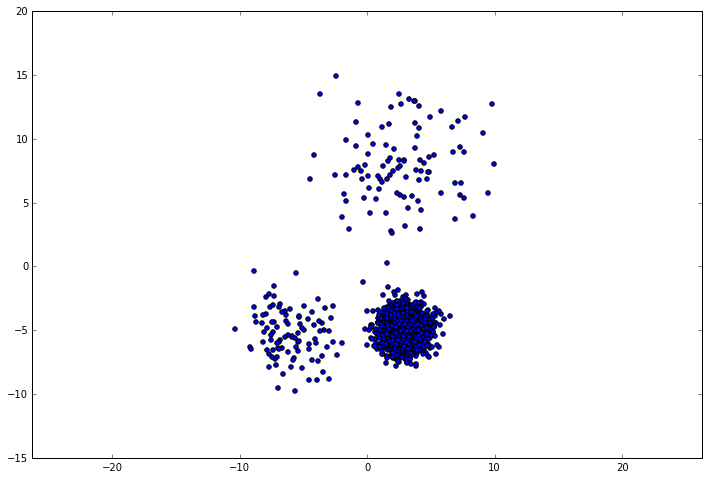

In [4]:
data_x = np.concatenate((c1[0], c2[0], c3[0]))
data_y = np.concatenate((c1[1], c2[1], c3[1]))

plt.figure(figsize=(12,8))
plt.axis('equal')
plt.scatter(data_x, data_y)
plt.show()

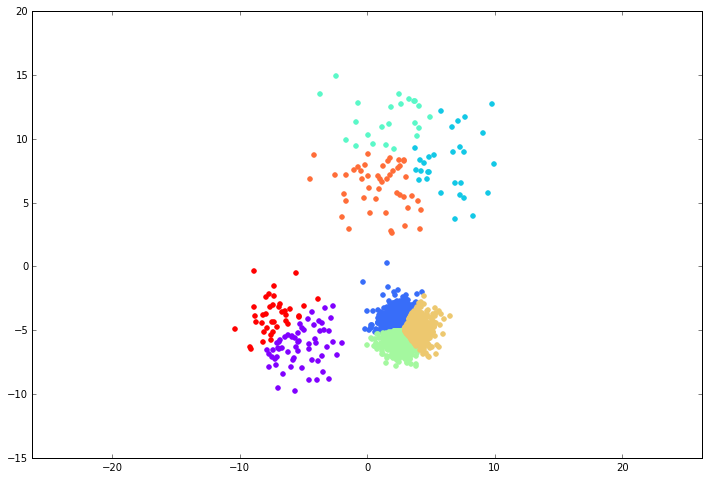

In [5]:
data = np.column_stack((data_x, data_y))

from sklearn.cluster import KMeans
import matplotlib.cm as cm

def plot_kmeans(k, data):
    c = len(k.cluster_centers_)
    plt.figure(figsize=(12,8))
    plt.axis('equal')
    ax = plt.gca()
    colors = iter(cm.rainbow(np.linspace(0, 1, c)))
    for i in range(c):
        xs = [x[0] for (x, y) in zip(data, k.labels_) if y == i]
        ys = [x[1] for (x, y) in zip(data, k.labels_) if y == i]
        ax.scatter(xs, ys, color=next(colors))
    plt.show()

kmeans = KMeans()

kmeans.fit(data)

plot_kmeans(kmeans, data)

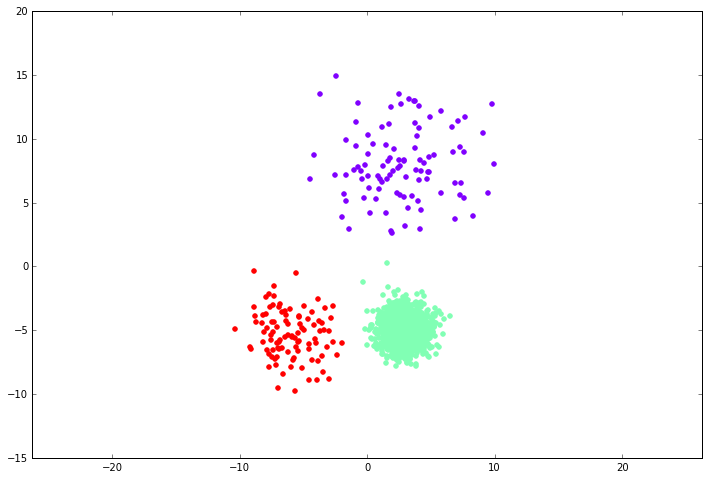

In [6]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

plot_kmeans(kmeans, data)

In [20]:
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
#fig = plt.figure()
#ax = plt.axes(xlim=(-30, 30), ylim=(-15, 20))
c = 3
colors = iter(cm.rainbow(np.linspace(0, 1, c)))
#line = plt.scatter([0],[0], color=next(colors))



#for i in range(c):
#        xs = [x[0] for (x, y) in zip(data, k.labels_) if y == i]
#        ys = [x[1] for (x, y) in zip(data, k.labels_) if y == i]
#        ax.scatter(xs, ys, color=next(colors))

line.set_array(np.array([]))

labels = []

#for i in range(10):
#    k = KMeans(n_clusters=3, random_state=123, max_iter=50)
#    k.fit(data)
#    labels.append(k.labels_)

def animate(i, data, line):
    #xs = [x[0] for (x, y) in zip(data, labels[i]) if y == 0]
    #ys = [x[1] for (x, y) in zip(data, labels[i]) if y == 0]
    line.set_array(np.column_stack(data))
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate,
#                               frames=range(10), fargs=(data, line))

#plt.close(anim._fig)
#HTML(anim.to_html5_video())

#plt.close(ani._fig)
#HTML(ani.to_html5_video())

In [19]:
# copied from http://stackoverflow.com/a/9416663
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream)
        self.scat = self.ax.scatter(x, y, c=c, s=s, animated=True)
        self.ax.axis([-10, 10, -10, 10])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        data = np.random.random((4, self.numpoints))
        xy = data[:2, :]
        s, c = data[2:, :]
        xy -= 0.5
        xy *= 10
        while True:
            xy += 0.03 * (np.random.random((2, self.numpoints)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield data

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:2, :])
        # Set sizes...
        self.scat._sizes = 300 * abs(data[2])**1.5 + 100
        # Set colors..
        self.scat.set_array(data[3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def show(self):
        plt.show()

a = AnimatedScatter()
plt.close(a.ani._fig)
HTML(a.ani.to_html5_video())